In [47]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
reshape_train_images = train_images.reshape(train_images.shape[0], -1)
#reshape_train_images = 255 - reshape_train_images
reshape_test_images = test_images.reshape(test_images.shape[0], -1)
print(reshape_train_images[0].shape)
print(reshape_train_images[0])

(784,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

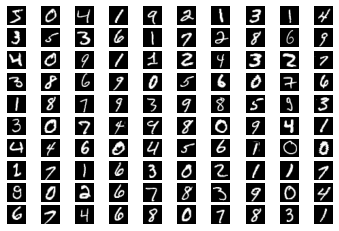

In [35]:
i = 0
while i < 100:
  plt.subplot(10, 10, i + 1)
  plt.axis("off")
  plt.imshow(train_images[i], cmap="gray")
  i += 1

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), 
                    activation="relu",
                    solver="adam",
                    alpha=1,
                    max_iter=200,
                    random_state=0)
mlp.fit(reshape_train_images, train_labels)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [27]:
print(f"train accuracy :{mlp.score(reshape_train_images, train_labels)}")
print(f"test accuracy :{mlp.score(reshape_test_images, test_labels)}")

train accuracy :0.98165
test accuracy :0.9651


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  87  56   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 237 255 164   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 237 255 164   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 237 255
 164   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 237 255 164   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 237 255 164   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  72 255 255   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 255 255   0   0   0   0   0   0   0   

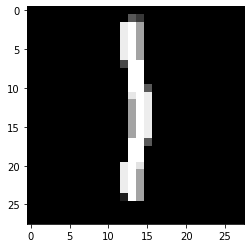

In [44]:
import cv2
img = cv2.imread("super1.png")
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = 255 - img
plt.imshow(img, cmap="gray")
img = img.reshape(784, -1).flatten()
print(img)

In [32]:
 def is_digits(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img,(28,28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape(784, -1).flatten()
    img = 255 - img
    result = mlp.predict(img.reshape(1, -1))
    return (result[0])

In [33]:
for i in range(0, 10, 1):
    print("This hand-written number is {}".format(is_digits(f"super{i}.png")))

This hand-written number is 0
This hand-written number is 1
This hand-written number is 2
This hand-written number is 3
This hand-written number is 4
This hand-written number is 5
This hand-written number is 6
This hand-written number is 8
This hand-written number is 8
This hand-written number is 9
